# Naive Bayes from Scratch

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

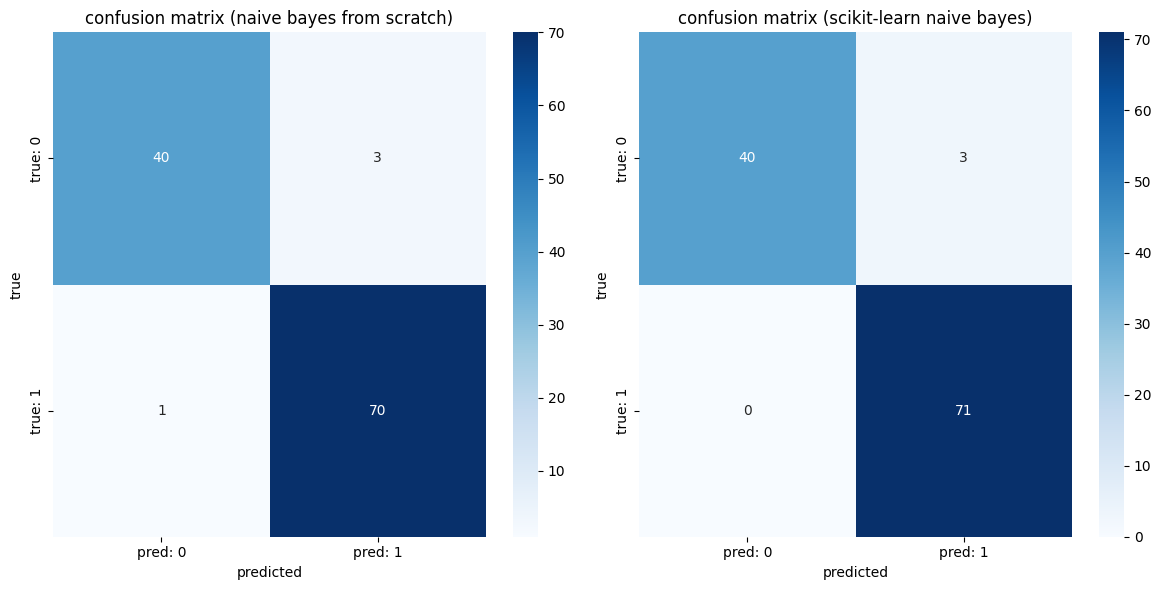

In [2]:
# naive bayes from scratch
class NaiveBayesScratch:
    def fit(self, X, y):
        # calculate mean, variance, and prior for each class
        self.classes = np.unique(y)
        self.mean = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.variance = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.priors = np.zeros(len(self.classes), dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.variance[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(X.shape[0])

    def _gaussian_probability(self, class_idx, x):
        # calculate gaussian probability for a feature value
        mean = self.mean[class_idx]
        variance = self.variance[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * variance))
        denominator = np.sqrt(2 * np.pi * variance)
        return numerator / denominator

    def predict(self, X):
        # predict class for each sample
        predictions = [self._predict_single(x) for x in X]
        return np.array(predictions)

    def _predict_single(self, x):
        # calculate posterior probability for a single sample
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            conditional = np.sum(np.log(self._gaussian_probability(idx, x)))
            posteriors.append(prior + conditional)
        return self.classes[np.argmax(posteriors)]

# load dataset
data = load_breast_cancer()
X = data.data  # features
y = data.target  # labels

# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train naive bayes from scratch
nb_scratch = NaiveBayesScratch()
nb_scratch.fit(X_train, y_train)
y_pred_scratch_nb = nb_scratch.predict(X_test)

# train naive bayes using scikit-learn
nb_sklearn = GaussianNB()
nb_sklearn.fit(X_train, y_train)
y_pred_sklearn_nb = nb_sklearn.predict(X_test)

# calculate confusion matrices
cm_scratch_nb = confusion_matrix(y_test, y_pred_scratch_nb)
cm_sklearn_nb = confusion_matrix(y_test, y_pred_sklearn_nb)

# plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# naive bayes from scratch confusion matrix
sns.heatmap(cm_scratch_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['pred: 0', 'pred: 1'], yticklabels=['true: 0', 'true: 1'], ax=axs[0])
axs[0].set_title('confusion matrix (naive bayes from scratch)')
axs[0].set_xlabel('predicted')
axs[0].set_ylabel('true')

# scikit-learn naive bayes confusion matrix
sns.heatmap(cm_sklearn_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['pred: 0', 'pred: 1'], yticklabels=['true: 0', 'true: 1'], ax=axs[1])
axs[1].set_title('confusion matrix (scikit-learn naive bayes)')
axs[1].set_xlabel('predicted')
axs[1].set_ylabel('true')

plt.tight_layout()
plt.show()